<a href="https://colab.research.google.com/github/Guitarjourneyman/Object-detection/blob/main/portholeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ccZy59bvyQmmgjjnMEg2")
project = rf.workspace("umat").project("pothole-abpqz")
version = project.version(1)
dataset = version.download("yolov5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 125.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pothole-1 in yolov5pytorch:: 100%|██████████| 1122/1122 [00:00<00:00, 7108.14it/s]


# Task
Train and test a YOLOv5 model using the dataset located in "content/Prthole-1/train" and "content/Prthole-1/test".

## Install dependencies

### Subtask:
Install the required libraries for YOLOv5.


**Reasoning**:
Clone the YOLOv5 repository and install the required libraries.



In [3]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17582, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 17582 (delta 0), reused 0 (delta 0), pack-reused 17579 (from 2)
Receiving objects: 100% (17582/17582), 16.86 MiB | 11.85 MiB/s, done.
Resolving deltas: 100% (11973/11973), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.9 MB/s eta 0:00:00


## Prepare data

### Subtask:
Ensure the dataset is in the correct format and location for YOLOv5 training.


**Reasoning**:
Verify the dataset directory structure and content to ensure it's in the correct format for YOLOv5 and located in the specified content directory.



In [4]:
import os
import glob

# Define the expected dataset path
dataset_path = '/content/Pothole-1' # Correct path relative to the current working directory (yolov5)

# Verify the dataset directory exists
if not os.path.exists(dataset_path):
    print(f"Error: Dataset directory not found at {dataset_path}")
else:
    print(f"Dataset directory found at {dataset_path}")

    # Define expected subdirectories
    expected_subdirs = ['train', 'test']
    for subdir in expected_subdirs:
        subdir_path = os.path.join(dataset_path, subdir)
        if not os.path.exists(subdir_path):
            print(f"Error: Expected subdirectory not found: {subdir_path}")
        else:
            print(f"Subdirectory found: {subdir_path}")
            # Verify images and labels directories within each split
            image_dir = os.path.join(subdir_path, 'images')
            label_dir = os.path.join(subdir_path, 'labels')

            if not os.path.exists(image_dir):
                print(f"Error: Images directory not found: {image_dir}")
            else:
                print(f"Images directory found: {image_dir}")

            if not os.path.exists(label_dir):
                print(f"Error: Labels directory not found: {label_dir}")
            else:
                print(f"Labels directory found: {label_dir}")

            # Check for corresponding image and label files
            image_files = glob.glob(os.path.join(image_dir, '*'))
            label_files = glob.glob(os.path.join(label_dir, '*'))

            print(f"Found {len(image_files)} image files in {image_dir}")
            print(f"Found {len(label_files)} label files in {label_dir}")

            # Basic check for file correspondence (by count and name prefix)
            if len(image_files) != len(label_files):
                 print(f"Warning: Number of images and labels in {subdir_path} do not match.")
            else:
                print(f"Number of images and labels match in {subdir_path}.")

            # Further check by comparing base names
            image_basenames = set([os.path.splitext(os.path.basename(f))[0] for f in image_files])
            label_basenames = set([os.path.splitext(os.path.basename(f))[0] for f in label_files])

            if image_basenames != label_basenames:
                 print(f"Warning: Basenames of images and labels in {subdir_path} do not match.")
            else:
                print(f"Basenames of images and labels match in {subdir_path}.")


    # Check a sample label file format (optional, but good practice)
    sample_label_file = None
    for subdir in expected_subdirs:
        label_files = glob.glob(os.path.join(dataset_path, subdir, 'labels', '*.txt'))
        if label_files:
            sample_label_file = label_files[0]
            break

    if sample_label_file:
        print(f"Checking sample label file: {sample_label_file}")
        with open(sample_label_file, 'r') as f:
            lines = f.readlines()
            if lines:
                first_line = lines[0].strip().split()
                # Expecting at least 5 values: class_id, center_x, center_y, width, height
                if len(first_line) >= 5:
                    try:
                        # Check if the values are convertible to float
                        _ = [float(val) for val in first_line]
                        print("Sample label file appears to be in correct YOLO format.")
                    except ValueError:
                        print("Error: Sample label file does not contain valid numeric values.")
                else:
                    print("Error: Sample label file does not have enough columns (expected at least 5).")
            else:
                print("Warning: Sample label file is empty.")
    else:
        print("No label files found to check format.")


Dataset directory found at /content/Pothole-1
Subdirectory found: /content/Pothole-1/train
Images directory found: /content/Pothole-1/train/images
Labels directory found: /content/Pothole-1/train/labels
Found 389 image files in /content/Pothole-1/train/images
Found 389 label files in /content/Pothole-1/train/labels
Number of images and labels match in /content/Pothole-1/train.
Basenames of images and labels match in /content/Pothole-1/train.
Subdirectory found: /content/Pothole-1/test
Images directory found: /content/Pothole-1/test/images
Labels directory found: /content/Pothole-1/test/labels
Found 55 image files in /content/Pothole-1/test/images
Found 55 label files in /content/Pothole-1/test/labels
Number of images and labels match in /content/Pothole-1/test.
Basenames of images and labels match in /content/Pothole-1/test.
Checking sample label file: /content/Pothole-1/train/labels/youtube-27_jpg.rf.bc2a4f6771a2a8114fe8808c518c3cdd.txt
Sample label file appears to be in correct YOLO 

## Configure Training

### Subtask:
Create a YAML configuration file for YOLOv5 training.

**Reasoning**:
Create a `data.yaml` file in the YOLOv5 directory. This file will contain the paths to the training and testing images and labels, as well as the number of classes and their names.

In [12]:
import yaml
import os

# Define the path to the dataset
dataset_path = '/content/Pothole-1'

# Define the path where the data.yaml file will be saved (within the yolov5 directory)
yaml_path = '/content/drive/MyDrive/250930_porthole/pothole_data.yaml'

# Define the number of classes and class names
nc = 1 # Number of classes (pothole)
names = ['pothole'] # Class names

# Create the data dictionary
data = {
    'train': os.path.join(dataset_path, 'train', 'images'),
    'val': os.path.join(dataset_path, 'test', 'images'), # Using test for validation as per the task
    'nc': nc,
    'names': names
}

# Write the data dictionary to the YAML file
with open(yaml_path, 'w') as f:
    yaml.dump(data, f)

print(f"Created data.yaml file at: {yaml_path}")

Created data.yaml file at: /content/drive/MyDrive/250930_porthole/pothole_data.yaml


## Train Model

### Subtask:
Train the YOLOv5 model using the configured dataset.

**Reasoning**:
Run the YOLOv5 training script with the `pothole_data.yaml` file.

In [13]:
# Train the YOLOv5 model
# --img: input image size
# --batch: batch size
# --epochs: number of epochs
# --data: path to the data.yaml file
# --cfg: model configuration file (e.g., yolov5s.yaml, yolov5m.yaml)
# --weights: initial weights (optional, e.g., yolov5s.pt for transfer learning)
# --name: experiment name (output directory will be runs/train/name)

# epochs: 모델이 전체 데이터셋을 몇 번 반복하여 학습할지를 정의합니다.
# 각 에포크에서 모델은 전체 훈련 데이터를 한 번씩 보게 됩니다.
# 에포크 수가 너무 적으면 모델이 데이터를 충분히 학습하지 못해 언더피팅될 수 있고,
# 너무 많으면 모델이 훈련 데이터에 과적합되어(오버피팅) 새로운 데이터에 대한 성능이 저하될 수 있습니다.
# 적절한 에포크 수는 데이터셋의 크기, 모델의 복잡성, 그리고 원하는 성능에 따라 달라집니다.

# batch_size: 한 번의 순전파(forward pass) 및 역전파(backward pass)에서 사용되는 이미지의 개수를 정의합니다.
# 배치 크기가 크면 한 번에 더 많은 데이터를 처리하므로 훈련 속도가 빨라질 수 있지만, 더 많은 GPU 메모리가 필요합니다.
# 배치 크기가 작으면 GPU 메모리를 적게 사용하지만, 훈련 속도가 느려질 수 있고 배치 정규화(Batch Normalization)의 효과가 감소할 수 있습니다.
# 배치 크기는 GPU 메모리 용량과 모델의 수렴 안정성을 고려하여 설정하는 것이 좋습니다.

# 크기 640 X 640 고정
!python train.py --img 640 --batch 16 --epochs 100 --data /content/drive/MyDrive/250930_porthole/pothole_data.yaml --weights yolov5s.pt --name pothole_detection_model

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
       9/99      4.39G    0.04717    0.03704          0        148        640:  28% 7/25 [00:01<00:04,  4.04it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       9/99      4.39G    0.04726    0.03717          0        129        640:  32% 8/25 [00:01<00:04,  3.67it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       9/99      4.39G     0.0473    0.03879          0        161        640:  36% 9/25 [00:02<00:04,  3.65it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       9/99      4.39G    0.04732    0.03736          0

## Evaluate Model

### Subtask:
Run the YOLOv5 testing script to evaluate the trained model.

**Reasoning**:
Run the YOLOv5 validation script (`val.py`) with the trained weights and the data configuration file.  
best.pt: **검증 데이터셋에서 가장 좋은 성능(최고의 mAP)**을 보인 모델 가중치

last.pt: 마지막 epoch에서 저장된 모델 가중치

In [14]:
!python val.py --weights /content/drive/MyDrive/250930_porthole/pothole_detection_model/weights/best.pt --data /content/drive/MyDrive/250930_porthole/pothole_data.yaml --img 640 --task val

val: data=/content/drive/MyDrive/250930_porthole/pothole_data.yaml, weights=['/content/drive/MyDrive/250930_porthole/pothole_detection_model/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-432-g725b922e Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/Pothole-1/test/labels.cache... 55 images, 0 backgrounds, 0 corrupt: 100% 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:03<00:00,  1.52s/it]
                   all         55        193      0.873      0.819      0.855      0.672
Speed: 0.3ms pre-process, 9.8ms inference, 

## Test with Custom Images

### Subtask:
Test the trained YOLOv5 model on custom images.

**Reasoning**:
Use the `detect.py` script provided by YOLOv5 to run inference on your custom images using the trained weights.

In [15]:
# Define the path to the directory containing your custom images
custom_images_dir = '/content/Pothole-1/test_porthole.jpeg' # Replace with the actual path to your images

# Define the path to the best trained weights
weights_path = '/content/drive/MyDrive/250930_porthole/pothole_detection_model/weights/best.pt' # Make sure this path is correct

# --conf 0.25	객체 검출의 신뢰도(Confidence) threshold 설정. 모델이 객체라고 예측한 확률이 이 값(0.25)보다 높을 때만 최종 결과로 출력
# --iou 0.45	중첩도(Intersection Over Union) threshold 설정. 이는 NMS(Non-Maximum Suppression) 과정에서 사용되며, 예측된 여러 개의 경계 상자(Bounding Box) 중 중첩되는 영역이 이 값(0.45)보다 크면 신뢰도가 낮은 경계 상자는 제거
# Run the detection script
!python detect.py --weights {weights_path} --source {custom_images_dir} --imgsz 640 --conf 0.25 --iou 0.45 --name custom_test

detect: weights=['/content/drive/MyDrive/250930_porthole/pothole_detection_model/weights/best.pt'], source=/content/Pothole-1/test_porthole.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=custom_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-432-g725b922e Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/Pothole-1/test_porthole.jpeg: 448x640 1 pothole, 30.3ms
Speed: 0.5ms pre-process, 30.3ms inference, 129.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/custom_test2


## Finish task

Detect an actual picture of pothole which I found from Google and see the result

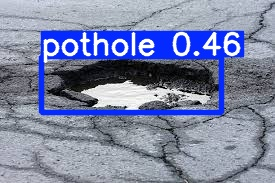

In [16]:
from IPython.display import Image, display

# 결과 이미지가 저장된 경로 지정
image_path = '/content/yolov5/runs/detect/custom_test2/test_porthole.jpeg'

# 이미지 출력
display(Image(filename=image_path))